<a href="https://colab.research.google.com/github/ShravaniAnilPatil/Codes/blob/main/BI%20exp5%20final2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving weather_classification_data.csv to weather_classification_data.csv


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Using Decision Tree: [1]
Using Naïve Bayes: [3]
Decision Tree Accuracy: 0.9056818181818181
Naïve Bayes Accuracy: 0.8628787878787879
Confusion Matrix (Decision Tree):
 [[576  39  17  19]
 [ 44 574  10  19]
 [ 18  10 662  11]
 [ 26  15  21 579]]
Confusion Matrix (Naïve Bayes):
 [[520  76   6  49]
 [ 19 545  39  44]
 [  5   7 656  33]
 [ 50  27   7 557]]


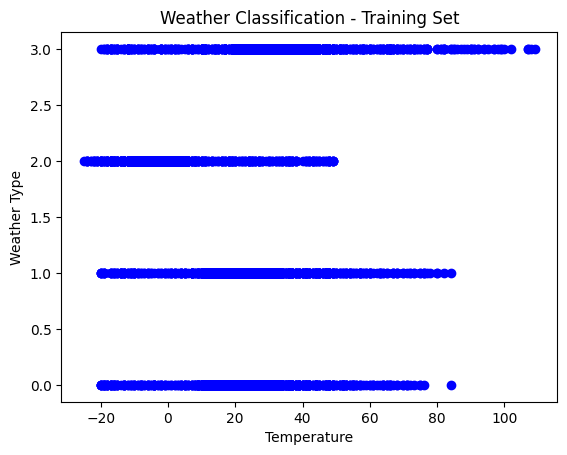

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
# Upload file manually
uploaded = files.upload()


# Load the dataset
data = pd.read_csv(list(uploaded.keys())[0])
data.head()
# Load dataset
  # Replace with actual file path






In [ ]:
# Encode categorical features
label_encoder = LabelEncoder()
categorical_cols = ['Cloud Cover', 'Season', 'Location', 'Weather Type']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


In [ ]:
# Split dataset into features and target
X = data.drop('Weather Type', axis=1)
y = data['Weather Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Train Naïve Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict a new result
new_data = np.array([[25, 60, 10, 20, 1, 1015, 5, 2, 10,1]])  # Example input
print("Using Decision Tree:", dtc.predict(new_data))
print("Using Naïve Bayes:", nb.predict(new_data))

# Predict on test set
y_pred_dtc = dtc.predict(X_test)
y_pred_nb = nb.predict(X_test)

# Evaluate models
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtc))
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# Confusion Matrices
print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dtc))
print("Confusion Matrix (Naïve Bayes):\n", confusion_matrix(y_test, y_pred_nb))


In [ ]:
# Visualization
plt.scatter(X_train['Temperature'], y_train, c='blue')
plt.title("Weather Classification - Training Set")
plt.xlabel("Temperature")
plt.ylabel("Weather Type")
plt.show()